## Importing necessary libraries

In [1]:
import pandas as pd
import re
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Loading Dataset

In [2]:
df = pd.read_csv("/content/SMSSpamCollection",sep='\t', names=['label', 'text'])
df.head(5)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Converting Labels


In [3]:
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["label"])

## Text Preprocessing

In [4]:
def clean(text):
  text = text.lower()
  text = re.sub(r'[^a-z0-9\s]','',text)
  return text

df["text"] = df["text"].apply(clean)

## Tokenization

In [5]:
max_words = 5000
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])

## Padding

In [6]:
max_length = 50
sequences = tokenizer.texts_to_sequences(df["text"])
x = pad_sequences(sequences,maxlen=max_length)

## Train - Test - Split

In [7]:
y  = df["label"].values
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

## Building Model

In [8]:
model = Sequential([
    Embedding(input_dim=max_words,output_dim=64,input_length = max_length),
    SimpleRNN(64,activation='tanh'),
    Dense(1,activation='sigmoid')
])

model.compile(loss = "binary_crossentropy",optimizer="adam",metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [9]:
hist = model.fit(
    xtrain,ytrain,
    epochs = 10,
    batch_size=32,
    validation_data=(xtest,ytest)
)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.8620 - loss: 0.3931 - val_accuracy: 0.9839 - val_loss: 0.0863
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9855 - loss: 0.0597 - val_accuracy: 0.9830 - val_loss: 0.0618
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9928 - loss: 0.0327 - val_accuracy: 0.9641 - val_loss: 0.0905
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9879 - loss: 0.0389 - val_accuracy: 0.9901 - val_loss: 0.0390
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9991 - loss: 0.0050 - val_accuracy: 0.9901 - val_loss: 0.0469
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9985 - loss: 0.0061 - val_accuracy: 0.9892 - val_loss: 0.0518
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9993 - loss: 0.0034 - val_accuracy: 0.9892 - val_loss: 0.0455
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9996 - loss: 0.0017 - val_accuracy: 0

## Model Evaluation

In [10]:
loss, accuracy = model.evaluate(xtest, ytest)
print(f'Test Accuracy: {accuracy:.4f}')

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9878 - loss: 0.0519
Test Accuracy: 0.9901


## Visualization

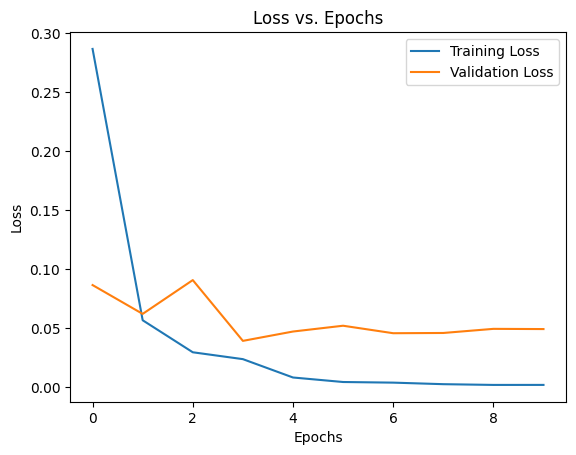

In [11]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

In [12]:
def predict_message(message):
    message = clean(message)
    seq = tokenizer.texts_to_sequences([message])
    padded = pad_sequences(seq, maxlen=max_length, padding='post')
    prediction = model.predict(padded)[0][0]
    return "Spam" if prediction > 0.5 else "Ham"

print(predict_message("Congratulations! You won a free prize"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
Ham
